# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread, imsave, imshow
from skimage.color import rgb2gray, gray2rgb
import matplotlib.pyplot as plt


## Atividade

#### 1) Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como parâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda. A função, obrigatoriamente, deverá seguir a seguinte nomenclatura:

* A imagem poderá ser colorida ou em tons de cinza. No caso de imagens coloridas, o
processamento deverá ser feito em cada banda de cor o resultado será retornado em
uma única imagem;
* O filtro será uma matrix MxN, onde M e N são:
  * Ímpares;
  * Maiores ou iguais a 3;
  * Menores que o tamanho da imagem (em cada dimensão).
* O parâmetro borda deverá ter 4 valores possíveis:
  * ‘ignore’: nesse caso a borda não será processada;
  * ‘espelho’: no tratamento da borda os pixels serão espelhados;
  * ‘zero’: o tratamento da borda será adicionando pixels de valor zero;
  * ‘replicar’: nesse caso, no tratamento da borda somente os pixels das linhas
extremas serão replicados.
* Teste a função de convolução com pelo menos 5 filtros diferentes. Explique os
resultados.

In [2]:
def conv_borda_ignore(imagem, kernel):
    
    imagem_processada = np.zeros_like(imagem)

    if len(imagem.shape) == 3:
        linhas, colunas, profundidade = imagem.shape
        for prof in range(profundidade):
            for col in range(colunas):
                for lin in range(linhas):
                    pass

    elif len(imagem.shape) == 2:
        linhas, colunas = imagem.shape
        for col in range(colunas):
            for lin in range(linhas):
                pass
        
        
        
    else:
        pass

In [3]:
def conv_borda_espelho(matriz, borda):
    
    largura = len(matriz[0]) + borda * 2


    altura = len(matriz) + borda * 2
    matriz_com_borda = [[0 for _ in range(largura)] for _ in range(altura)]

    matriz_com_borda_2 = list()
    for _ in range(altura):
        aux = list()
        for _ in range(largura):
            aux.append(0)
        matriz_com_borda_2.append(aux)

    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            matriz_com_borda_2[i+borda][j+borda] = matriz[i][j]


    for aux_borda in reversed(range(borda)):
        aux_top = list()
        aux_bottom = list()
        for aux in range(borda):
            aux_top.append(matriz_com_borda_2[borda - (aux - 1)])
            aux_bottom.append(matriz_com_borda_2[-(borda - (aux - 1)) - 1])

        matriz_com_borda_2[aux_borda] = aux_top[-(aux_borda)]
        matriz_com_borda_2[-(aux_borda) - 1] = aux_bottom[-(aux_borda)]

    for x, y in enumerate(matriz_com_borda_2):
        for aux_borda in reversed(range(borda)):
            aux_left = list()
            aux_right = list()
            for aux in range(borda):
                aux_left.append(y[borda - (aux - 1)])
                aux_right.append(y[-(borda) - (aux - 1) - 2])

            print(aux_left, aux_right)
            y[aux_borda] = aux_left[-(aux_borda)]
            print(-(aux_borda) - 1)
            y[-(aux_borda) - 1] = aux_right[-(aux_borda) - 1]


In [4]:
def conv_borda_zero(matriz, borda):
    
    # cria uma nova matriz com as dimensões apropriadas
    largura = len(matriz[0]) + borda * 2
    altura = len(matriz) + borda * 2

    matriz_replicar = list()
    for _ in range(altura):
        aux = list()
        for _ in range(largura):
            aux.append(0)
        matriz_replicar.append(aux)

    # copia os valores da matriz original para a nova matriz
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            matriz_replicar[i+borda][j+borda] = matriz[i][j]

    return matriz_replicar


In [5]:
def conv_borda_replicar(matriz, kernel, borda):

    # cria uma nova matriz com as dimensões apropriadas
    largura = len(matriz[0]) + borda * 2
    altura = len(matriz) + borda * 2

    matriz_replicar = list()
    for _ in range(altura):
        aux = list()
        for _ in range(largura):
            aux.append(0)
        matriz_replicar.append(aux)

    # copia os valores da matriz original para a nova matriz
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            matriz_replicar[i+borda][j+borda] = matriz[i][j]

    for aux in range(borda):
        matriz_replicar[aux] = matriz_replicar[borda].copy()
        matriz_replicar[-(aux) - 1] = matriz_replicar[-(borda) - 1].copy()

    for x, y in enumerate(matriz_replicar):
        for aux in range(borda):
            y[aux] = y[borda]
            y[-(aux) - 1] = y[-(borda) - 1]
            
    return matriz_replicar


In [6]:
def convolucao(imagem, filtro, borda='ignore'):

    if borda == 'ignore':
        conv_borda_ignore(imagem, filtro)

    elif borda == 'espelho':
        conv_borda_espelho(imagem, filtro)

    elif borda == 'zeros':
        centro = (filtro.shape[0]//2)
        imagem_processada = list()

        if len(imagem.shape) == 3:
            linhas, colunas, profundidade = imagem.shape
            for x in range(profundidade):
                imagem_processada.append(conv_borda_zero(
                    imagem[:, :, x], centro))

            imagem_processada = np.array(imagem_processada)
            imagem_processada = imagem_processada.transpose(1, 2, 0)

        elif len(imagem.shape) == 2:
            imagem_processada = conv_borda_zero(imagem, centro)
            imagem_processada = np.array(imagem_processada)

        else:
            print("Error desconhecido!")
            return None

        return imagem_processada

    elif borda == 'replicar':

        centro = (filtro.shape[0]//2)
        imagem_processada = list()

        if len(imagem.shape) == 3:
            linhas, colunas, profundidade = imagem.shape
            for x in range(profundidade):
                imagem_processada.append(conv_borda_replicar(imagem[:, :, x], filtro, centro))

            imagem_processada = np.array(imagem_processada)
            imagem_processada = imagem_processada.transpose(1, 2, 0)

        elif len(imagem.shape) == 2:
            imagem_processada = conv_borda_replicar(imagem, filtro, centro)
            imagem_processada = np.array(imagem_processada)

        else:
            print("Error desconhecido!")
            return None
        
        return imagem_processada


    else:
        print("Borda desconhecida!")


In [64]:
kernel = np.random.rand(9, 9)
print(kernel)

[[0.3570103  0.14077938 0.47631099 0.06905348 0.20699741 0.73483961
  0.39142287 0.84807542 0.95378745]
 [0.2812926  0.61792802 0.63686803 0.99307896 0.86023674 0.34014878
  0.83403185 0.8021746  0.52373945]
 [0.91581186 0.51999727 0.306258   0.33673073 0.99619393 0.06473485
  0.89703239 0.18070963 0.66111076]
 [0.94123506 0.52775225 0.38841254 0.54946533 0.77438386 0.53895692
  0.15538923 0.18084568 0.25854368]
 [0.83537231 0.93304942 0.66416816 0.55860511 0.51296843 0.19957217
  0.34325725 0.96764047 0.19665959]
 [0.20093577 0.03609003 0.88125445 0.15082096 0.17760132 0.38576333
  0.72210513 0.73493245 0.72867953]
 [0.54846459 0.91334986 0.98697038 0.55194848 0.60647192 0.22160242
  0.56898718 0.05602135 0.77490791]
 [0.1051146  0.10917716 0.412363   0.80446849 0.34235877 0.58230908
  0.77571082 0.88055828 0.58672357]
 [0.81924805 0.79843262 0.44883467 0.30066425 0.4152213  0.91993794
  0.31282527 0.87544382 0.56221467]]


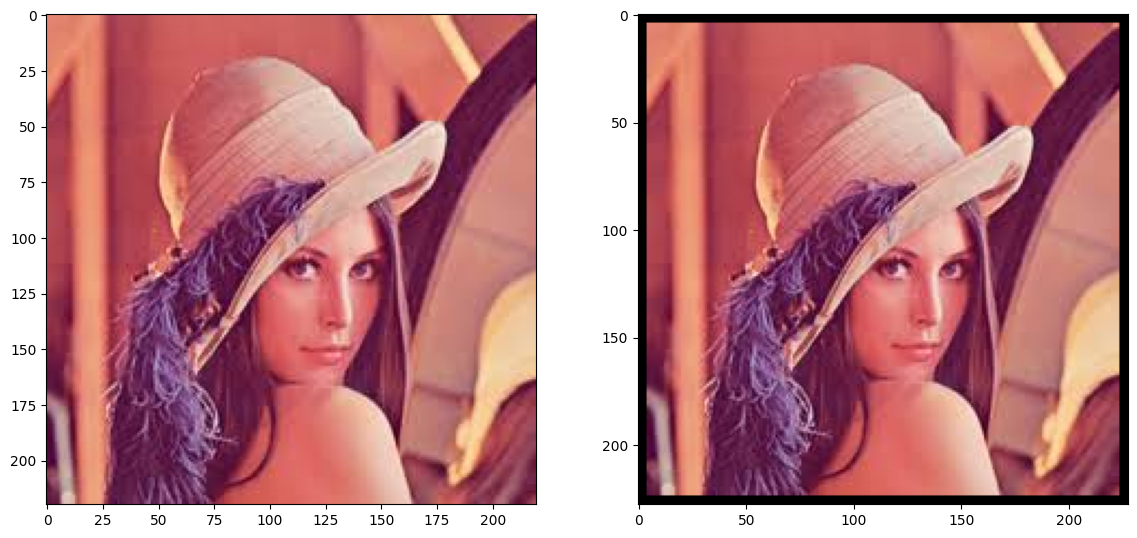

In [65]:
img = imread("lenna.jpg")
# img = rgb2gray(img)
img_alter = convolucao(img, kernel, 'zeros')

plt.figure(figsize=(14, 14))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(img_alter, cmap='gray')


In [69]:
matriz = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
borda = 2

# cria uma nova matriz com as dimensões apropriadas
largura = len(matriz[0]) + borda * 2
altura = len(matriz) + borda * 2
matriz_com_borda = [[0 for _ in range(largura)] for _ in range(altura)]

matriz_com_borda_2 = list()
for _ in range(altura):
    aux = list()
    for _ in range (largura):
        aux.append(0)
    matriz_com_borda_2.append(aux)

# copia os valores da matriz original para a nova matriz
for i in range(len(matriz)):
    for j in range(len(matriz[0])):
        matriz_com_borda_2[i+borda][j+borda] = matriz[i][j]

for aux in range(borda):
    matriz_com_borda_2[aux] = matriz_com_borda_2[borda].copy()
    matriz_com_borda_2[-(aux) - 1] = matriz_com_borda_2[-(borda) - 1].copy()

for x,y in enumerate(matriz_com_borda_2):
    for aux in range(borda):
        y[aux] = y[borda]
        y[-(aux) - 1] = y[-(borda) - 1]


In [70]:
matriz

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [71]:
matriz_com_borda_2


[[1, 1, 1, 2, 3, 3, 3],
 [1, 1, 1, 2, 3, 3, 3],
 [1, 1, 1, 2, 3, 3, 3],
 [4, 4, 4, 5, 6, 6, 6],
 [7, 7, 7, 8, 9, 9, 9],
 [7, 7, 7, 8, 9, 9, 9],
 [7, 7, 7, 8, 9, 9, 9]]

In [123]:
matriz = [[11, 12, 13, 14, 15], [16, 17, 18, 19, 20], [21, 22, 23, 24, 25], [26, 27, 28, 29, 30], [31, 32, 33, 34, 35]]
borda = 2

# cria uma nova matriz com as dimensões apropriadas
largura = len(matriz[0]) + borda * 2
altura = len(matriz) + borda * 2
matriz_com_borda = [[0 for _ in range(largura)] for _ in range(altura)]

matriz_com_borda_2 = list()
for _ in range(altura):
    aux = list()
    for _ in range(largura):
        aux.append(0)
    matriz_com_borda_2.append(aux)

# copia os valores da matriz original para a nova matriz
# for i in range(len(matriz)):
#     for j in range(len(matriz[0])):
#         matriz_com_borda_2[i+borda][j+borda] = matriz[i][j]
        

for i in range(len(matriz)):
    for j in range(len(matriz[0])):
        matriz_com_borda_2[i+borda][j+borda] = matriz[i][j]
        
        

for aux_borda in reversed(range(borda)):
    aux_top = list()
    aux_bottom = list()
    for aux in range(borda):
        aux_top.append(matriz_com_borda_2[borda - (aux - 1)])
        aux_bottom.append(matriz_com_borda_2[-(borda - (aux - 1)) - 1])
        
    matriz_com_borda_2[aux_borda] = aux_top[-(aux_borda)]
    matriz_com_borda_2[-(aux_borda) - 1] = aux_bottom[-(aux_borda)]

for x, y in enumerate(matriz_com_borda_2):
    for aux_borda in reversed(range(borda)):
        aux_left = list()
        aux_right = list()
        for aux in range(borda):
            aux_left.append(y[borda - (aux - 1)])
            aux_right.append(y[-(borda) - (aux - 1) - 2])
        
        print(aux_left, aux_right)
        y[aux_borda] = aux_left[-(aux_borda)]
        print(-(aux_borda) - 1)
        y[-(aux_borda) - 1] = aux_right[-(aux_borda) - 1]


[17, 16] [20, 19]
-2
[17, 16] [20, 19]
-1
[12, 11] [15, 14]
-2
[12, 11] [15, 14]
-1
[12, 11] [15, 14]
-2
[12, 11] [15, 14]
-1
[17, 16] [20, 19]
-2
[17, 16] [20, 19]
-1
[22, 21] [25, 24]
-2
[22, 21] [25, 24]
-1
[27, 26] [30, 29]
-2
[27, 26] [30, 29]
-1
[32, 31] [35, 34]
-2
[32, 31] [35, 34]
-1
[32, 31] [35, 34]
-2
[32, 31] [35, 34]
-1
[27, 26] [30, 29]
-2
[27, 26] [30, 29]
-1


In [124]:
matriz_com_borda_2


[[17, 16, 16, 17, 18, 19, 20, 20, 19],
 [12, 11, 11, 12, 13, 14, 15, 15, 14],
 [12, 11, 11, 12, 13, 14, 15, 15, 14],
 [17, 16, 16, 17, 18, 19, 20, 20, 19],
 [22, 21, 21, 22, 23, 24, 25, 25, 24],
 [27, 26, 26, 27, 28, 29, 30, 30, 29],
 [32, 31, 31, 32, 33, 34, 35, 35, 34],
 [32, 31, 31, 32, 33, 34, 35, 35, 34],
 [27, 26, 26, 27, 28, 29, 30, 30, 29]]